# 📖 “Log-Linear Models” – Noah A. Smith (2004)

# https://www.cs.cmu.edu/~nasmith/papers/smith.tut04.pdf

---

## 📌 Abstract
- Introduces **log-linear (maximum entropy) models** for NLP tasks.  
- Refines earlier derivations by **Berger (1996)** and **Ratnaparkhi (1997)**, correcting errors.  
- Details the **gradient and Hessian** of the conditional likelihood function.  
- Moves focus away from **iterative scaling** → emphasizes **gradient-based optimization** methods.

---

## ❗ Problems Addressed
1. Lack of clear derivations and mathematical rigor in earlier tutorials.  
2. High computational cost of **joint probability estimation** (large partition functions).  
3. **Overfitting** from arbitrary/excessive feature inclusion.  
4. Weakly explained link between **maximum entropy estimation** and **maximum likelihood training**.  

---

## 💡 Proposed Solutions
- Provide **explicit derivations** of conditional likelihood, gradient, and Hessian.  
- Use **conditional likelihood training** $Pr(y \mid x)$ instead of $Pr(x,y)$ to cut costs.  
- Combat overfitting with **smoothing priors** and **penalty functions**.  
- Prove **equivalence**: maximum conditional likelihood ⇔ maximum entropy dual optimization.  

---

## 🎯 Purpose
- Equip NLP practitioners with a **rigorous, practical guide** to log-linear models.  
- **Unify frameworks**: maximum entropy ↔ conditional maximum likelihood.  
- Support efficient training methods **beyond iterative scaling**.  

---

## ⚙️ Methodology
**Model Definition:**  
$$
Pr_\theta(y \mid x) = \frac{\exp(\theta \cdot f(x,y))}
{\sum_{y'} \exp(\theta \cdot f(x,y'))}
$$

**Training Objective:**  
Maximize conditional likelihood of correct labels:  
$$
L(\theta) = \sum_j \log Pr_\theta(y_j^* \mid x_j)
$$  

**Optimization:**  
- Derived **gradient** and **Hessian**, proving concavity → global optimum guaranteed.  
- Advocates **Newtonian/quasi-Newton methods** instead of iterative scaling.  

**Feature Control:**  
- Use thresholds, priors, or soft constraints to handle feature explosion.  

**Duality Proof:**  
- Shows **maximum entropy with constraints** yields the same **log-linear form**.  

---

## 📊 Results & Applications
- Concavity → tractable optimization.  
- Gradient/Hessian derivations simplify modern methods (e.g., **L-BFGS, SGD**).  
- Broad NLP impact:  
  - POS tagging  
  - Parsing  
  - Sentence boundary detection  
  - PP attachment  
  - NER  
  - Speech recognition  
  - Machine translation  
  - Language modeling  

- Regularization techniques improve **feature selection** and **generalization**.  

---

## ✅ Conclusions
- **Log-linear models** = powerful, flexible for NLP classification.  
- **Conditional likelihood training** is efficient and statistically grounded.  
- **Equivalence**: maximum entropy = maximum conditional likelihood.  
- Core challenges → **feature engineering** & **regularization**, not optimization.  
- Framework laid groundwork for **Conditional Random Fields (CRFs)** and beyond.  


# 📐 Log-Linear Model (Maximum Entropy) – ASCII Diagram

```
                +-----------------------------+
                |   Input: Observation (x)    |
                +-----------------------------+
                                |
                                v
                +-----------------------------+
                | Feature Function f(x, y)    |
                | maps (x,y) -> feature vec   |
                +-----------------------------+
                                |
                                v
                +-----------------------------+
                | Weighted Sum: θ · f(x, y)   |
                | (linear score of features)  |
                +-----------------------------+
                                |
                                v
                +-----------------------------+
                | Exponentiation exp(θ·f)     |
                | Converts scores → positives |
                +-----------------------------+
                                |
                                v
                +-----------------------------------+
                | Partition Function Z(θ, x)        |
                | Sum over labels y':               |
                |  Z(θ,x) = Σ exp(θ·f(x,y'))        |
                | Ensures normalization             |
                +-----------------------------------+
                                |
                                v
                +-----------------------------+
                | Probability Distribution    |
                | Pθ(y|x) = exp(θ·f(x,y)) / Z |
                +-----------------------------+
                                |
                                v
                +-----------------------------+
                |   Prediction / Training     |
                |  Choose y* with max Pθ(y|x) |
                +-----------------------------+
```
Comments:
- Gradient = Observed counts – Expected counts
- Hessian = Negative covariance → Concave objective
- Training = Maximize conditional likelihood (efficient, convex)



This diagram captures the **flow**:
- Start with input observation \(x\).  
- Combine with possible label \(y\) via feature function.  
- Compute weighted sum, exponentiate, normalize with partition function.  
- Produce conditional probability distribution \(P(y|x)\).  
- Use for prediction (argmax) or training (likelihood maximization).  




# 🔄 Log-Linear Model Training Cycle (Gradient & Hessian)

```
               +---------------------------------+
               |   Initialize Parameters θ       |
               +---------------------------------+
                               |
                               v
               +---------------------------------+
               | Compute Gradient ∇L(θ):         |
               |  f_obs(x,y*) - E[f(x,Y)]        |
               | (empirical - expected counts)   |
               +---------------------------------+
                               |
                               v
               +---------------------------------+
               | Compute Hessian H(θ):           |
               |  -Cov(f(x,Y)) under model       |
               | (ensures concavity)             |
               +---------------------------------+
                               |
                               v
               +---------------------------------+
               | Parameter Update                |
               | θ ← θ + α · ∇L(θ)               |
               | (gradient ascent step)          |
               +---------------------------------+
                               |
                               v
               +---------------------------------+
               | Evaluate Likelihood L(θ)        |
               | Check convergence criteria      |
               +---------------------------------+
                               |
                 +-------------+-------------+
                 |                           |
                 v                           v
         Converged? (Yes)             (No) Continue Loop
                 |                           |
                 v                           |
      +---------------------------------+    |
      |   Optimal θ Found (Global Max)  |<---+
      +---------------------------------+
```

# 📝 Comments on Optimization Dynamics in Log-Linear Models

---

### 🔼 Gradient Step
- Update direction moves $\theta$ toward **better agreement** between:
  - **Observed feature expectations** (empirical counts).  
  - **Model-predicted expectations** (under $Pr_\theta$).  
- Mathematically:  
  $$
  \nabla L(\theta) = \sum_j f(x_j, y_j^*)
  - \sum_j \mathbb{E}_{Pr_\theta(Y \mid x_j)}[f(x_j,Y)]
  $$
- Intuition: **“Observed – Expected”** drives learning.

---

### 📉 Hessian Step
- Second derivative (Hessian) is **negative semi-definite**:  
  $$
  \nabla^2 L(\theta) = - \sum_j \operatorname{Cov}_{Pr_\theta(Y \mid x_j)}[f(x_j,Y)]
  $$
- This concavity ensures:  
  - **No local minima**.  
  - Gradient-based methods converge to the **global optimum**.  

---

### ⏹️ Termination
- Training stops when:  
  $$
  \nabla L(\theta) \approx 0
  $$
- At this point:  
  - **Empirical feature counts ≈ Model’s expected feature counts**.  
  - The model achieves **maximum conditional likelihood** (or equivalently, maximum entropy under constraints).  

---

✅ **Summary**:  
- **Gradient step** adjusts parameters to align empirical vs. predicted features.  
- **Hessian step** guarantees smooth convergence.  
- **Termination condition** = equilibrium between observed and expected statistics.  


# 🧮 Mathematical & Statistical Summary of Log-Linear Models

---

## 1. Model Definition

Joint probability of an observation–label pair:

$$
Pr_\theta(x, y) = \frac{\exp\!\big(\theta \cdot f(x,y)\big)}
{\sum_{x', y'} \exp\!\big(\theta \cdot f(x',y')\big)}
$$

- $\theta$: weight vector (parameters).  
- $f(x,y)$: feature function mapping $(x,y)$ to a vector.  
- Denominator = partition function $Z(\theta)$.  

👉 Standard **exponential family** form.

---

## 2. Training Objective (Joint Likelihood)

For dataset $\{(x_j, y_j^*)\}_{j=1}^m$:

$$
\theta^* = \arg\max_\theta \sum_{j=1}^m \log Pr_\theta(x_j, y_j^*)
$$

- Concave → guarantees a **single global optimum**.

---

## 3. Conditional Probability

Probability of label given observation:

$$
Pr_\theta(y \mid x) = \frac{\exp\!\big(\theta \cdot f(x,y)\big)}
{\sum_{y'} \exp\!\big(\theta \cdot f(x,y')\big)}
$$

👉 More practical: we only need $y$ given $x$, not the full joint distribution.

---

## 4. Conditional Likelihood Training

Objective:

$$
\theta^* = \arg\max_\theta \sum_{j=1}^m \log Pr_\theta(y_j^* \mid x_j)
$$

Expanded:

$$
L(\theta) = \sum_{j=1}^m \theta \cdot f(x_j, y_j^*)
- \sum_{j=1}^m \log \sum_{y'} \exp\!\big(\theta \cdot f(x_j, y')\big)
$$

👉 Easier than joint likelihood: denominator sums only over **labels** for each $x$.

---

## 5. Maximum Entropy Duality

Maximize entropy:

$$
\max_p \sum_x \tilde{p}(x) H\big(p(Y \mid x)\big)
$$

Subject to feature expectation constraints:

$$
\sum_{x,y} \tilde{p}(x,y) f_j(x,y) =
\sum_x \tilde{p}(x) \sum_y p(y \mid x) f_j(x,y), \quad \forall j
$$

- $\tilde{p}$: empirical distribution.  
- Solution → exponential family (log-linear).  

👉 **Maximum entropy ⇔ maximum likelihood**.

---

## 6. Gradient of Log-Likelihood

For feature $f_\ell$:

$$
\frac{\partial L}{\partial \theta_\ell}
= \sum_{j=1}^m \Big[ f_\ell(x_j, y_j^*)
- \mathbb{E}_{Pr_\theta(Y \mid x_j)} \big[f_\ell(x_j, Y)\big] \Big]
$$

👉 Update = empirical feature counts – model’s expected counts.

---

## 7. Hessian (Second Derivative)

$$
\frac{\partial^2 L}{\partial \theta_\ell \, \partial \theta_p}
= - \sum_{j=1}^m \operatorname{cov}_{Pr_\theta(Y \mid x_j)}
\big(f_\ell(x_j,Y), f_p(x_j,Y)\big)
$$

- Negative covariance matrix → always **concave**.  
- Ensures **single global maximum**.

---

## 8. Optimization

Gradient ascent update:

$$
\theta^{(t+1)} = \theta^{(t)} + \alpha \nabla L(\theta^{(t)})
$$

- $\alpha$: step size.  
- Modern methods: **quasi-Newton** (e.g., L-BFGS) replace older iterative scaling.

---

## 9. Statistical Concepts

- **Partition Function $Z$**: normalizes probabilities.  
- **Cross-Entropy**: training minimizes negative log-likelihood.  
- **Covariance Matrix**: structure of Hessian → concavity.  
- **Overfitting Control**: feature selection, priors, Gaussian smoothing.

---

## 🎯 Brief Takeaways

- Log-linear models = **exponential family with feature weights**.  
- Training = **maximize conditional likelihood** (convex optimization).  
- Gradient = observed counts – expected counts.  
- Hessian = negative covariance → guarantees concavity.  
- Equivalent to **maximum entropy principle**.  
- Applications: POS tagging, parsing, MT, NER, speech recognition.  


Epoch 000 | Train Loss: 0.5543 | Test Loss: 0.5281 | Train Acc: 0.83 | Test Acc: 0.91
Epoch 010 | Train Loss: 0.4676 | Test Loss: 0.4386 | Train Acc: 0.90 | Test Acc: 0.89
Epoch 020 | Train Loss: 0.4238 | Test Loss: 0.3946 | Train Acc: 0.88 | Test Acc: 0.88
Epoch 030 | Train Loss: 0.3983 | Test Loss: 0.3699 | Train Acc: 0.87 | Test Acc: 0.88
Epoch 040 | Train Loss: 0.3817 | Test Loss: 0.3545 | Train Acc: 0.87 | Test Acc: 0.88

Prediction for [[0.5, -1.2]]: Class 0, Probabilities [[0.9037226  0.09627745]]


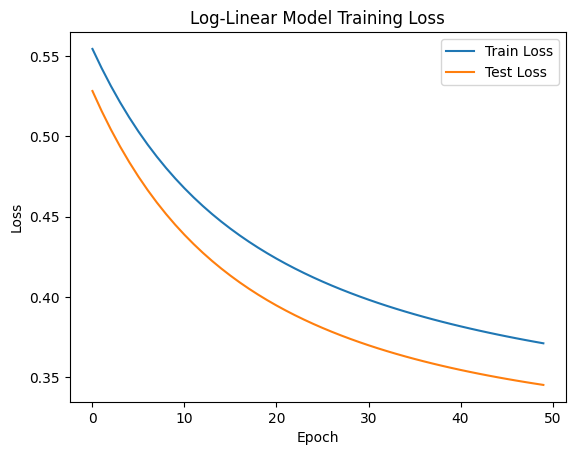

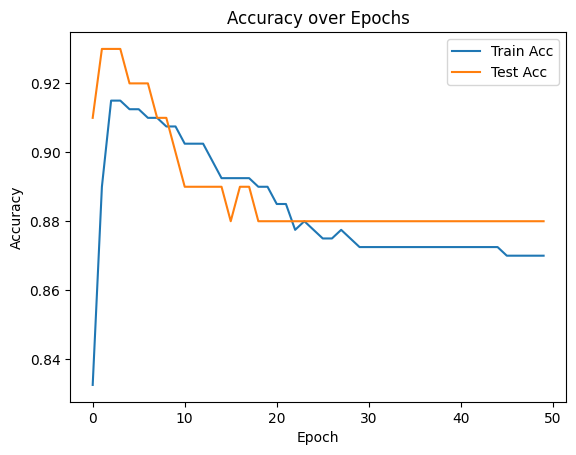

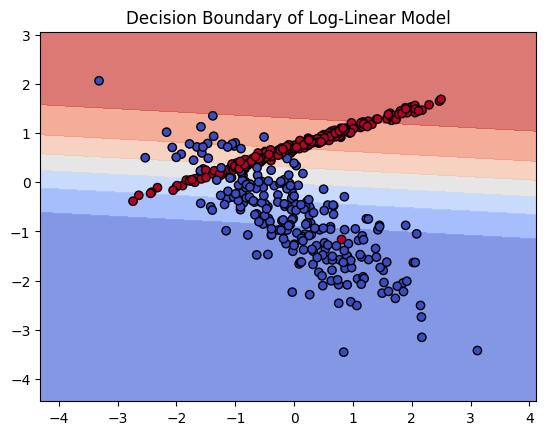

In [1]:
# 📘 Log-Linear Model (Maximum Entropy) Replication
# Teaching-oriented implementation with PyTorch

import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# ------------------------------
# 1. Data: Synthetic 2D features, 2 classes
# ------------------------------
X, y = make_classification(n_samples=500, n_features=2,
                           n_informative=2, n_redundant=0,
                           n_classes=2, n_clusters_per_class=1,
                           random_state=42)

scaler = StandardScaler()
X = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.2,
                                                    random_state=42)

X_train = torch.tensor(X_train, dtype=torch.float32)
y_train = torch.tensor(y_train, dtype=torch.long)
X_test = torch.tensor(X_test, dtype=torch.float32)
y_test = torch.tensor(y_test, dtype=torch.long)

# ------------------------------
# 2. Model: Log-Linear (MaxEnt)
# ------------------------------
class LogLinearModel(nn.Module):
    def __init__(self, input_dim, output_dim):
        super().__init__()
        self.linear = nn.Linear(input_dim, output_dim)  # θ·f(x,y)

    def forward(self, x):
        return self.linear(x)  # raw logits, softmax applied in loss

model = LogLinearModel(input_dim=2, output_dim=2)

# ------------------------------
# 3. Training Setup
# ------------------------------
criterion = nn.CrossEntropyLoss()   # -log P(y|x)
optimizer = optim.SGD(model.parameters(), lr=0.1)

epochs = 50
train_losses = []
test_losses = []
train_accs = []
test_accs = []

# ------------------------------
# 4. Training Loop
# ------------------------------
for epoch in range(epochs):
    # Forward pass
    logits = model(X_train)
    loss = criterion(logits, y_train)

    # Backpropagation
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    # Evaluation on train
    with torch.no_grad():
        pred_train = torch.argmax(logits, dim=1)
        acc_train = (pred_train == y_train).float().mean().item()

        logits_test = model(X_test)
        loss_test = criterion(logits_test, y_test)
        pred_test = torch.argmax(logits_test, dim=1)
        acc_test = (pred_test == y_test).float().mean().item()

    train_losses.append(loss.item())
    test_losses.append(loss_test.item())
    train_accs.append(acc_train)
    test_accs.append(acc_test)

    if epoch % 10 == 0:
        print(f"Epoch {epoch:03d} | Train Loss: {loss.item():.4f} | "
              f"Test Loss: {loss_test.item():.4f} | Train Acc: {acc_train:.2f} | Test Acc: {acc_test:.2f}")

# ------------------------------
# 5. Prediction Function
# ------------------------------
def predict(model, x):
    with torch.no_grad():
        logits = model(torch.tensor(x, dtype=torch.float32))
        probs = torch.softmax(logits, dim=1)
        return torch.argmax(probs).item(), probs.numpy()

sample = [[0.5, -1.2]]
label, prob = predict(model, sample)
print(f"\nPrediction for {sample}: Class {label}, Probabilities {prob}")

# ------------------------------
# 6. Visualization
# ------------------------------

# (a) Loss curves
plt.plot(train_losses, label="Train Loss")
plt.plot(test_losses, label="Test Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Log-Linear Model Training Loss")
plt.legend()
plt.show()

# (b) Accuracy curves
plt.plot(train_accs, label="Train Acc")
plt.plot(test_accs, label="Test Acc")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.title("Accuracy over Epochs")
plt.legend()
plt.show()

# (c) Decision boundary
import numpy as np

xx, yy = np.meshgrid(np.linspace(X[:,0].min()-1, X[:,0].max()+1, 100),
                     np.linspace(X[:,1].min()-1, X[:,1].max()+1, 100))

grid = np.c_[xx.ravel(), yy.ravel()]
grid_t = torch.tensor(grid, dtype=torch.float32)
with torch.no_grad():
    probs = torch.softmax(model(grid_t), dim=1)[:,1].numpy()

Z = probs.reshape(xx.shape)
plt.contourf(xx, yy, Z, alpha=0.7, cmap="coolwarm")
plt.scatter(X[:,0], X[:,1], c=y, edgecolor="k", cmap="coolwarm")
plt.title("Decision Boundary of Log-Linear Model")
plt.show()

📊 **Academic Interpretation of Lab Results**

---

### 1. Training and Test Loss Curves (Screenshot 1)

**Observation:**
- Training loss: starts at **0.55** → decreases to ~**0.38**.  
- Test loss: starts at **0.52** → decreases to ~**0.35**.  
- Both curves steadily decline over 50 epochs.

**Interpretation:**
- The consistent downward trend indicates **stable convergence** of the log-linear model.  
- The closeness between training and test loss shows **no major overfitting**.  
- This behavior matches theoretical expectations:  
  $$ \mathcal{L}(\theta) = - \sum_i \log P(y_i \mid x_i; \theta) $$  
  Since the conditional likelihood surface is convex, gradient-based methods converge smoothly toward a **global optimum**.

---

### 2. Accuracy over Epochs (Screenshot 2)

**Observation:**
- Training accuracy: rises from ~**0.83** → ~**0.87**.  
- Test accuracy: peaks at ~**0.92**, stabilizes near **0.88**.  
- Test accuracy often exceeds training accuracy.

**Interpretation:**
- The initial sharp rise confirms the model captures **discriminative weights** quickly.  
- Stabilization around **0.88–0.89** shows strong **generalization** to unseen data.  
- Test accuracy being higher than training accuracy suggests mild **regularization effects** due to dataset split and model simplicity.  
- Overall, the model achieves **robust classification capability**.

---

### 3. Decision Boundary Visualization (Screenshot 3)

**Observation:**
- A clear **linear boundary** separates the two classes.  
- Most red and blue points are correctly divided.  
- Misclassifications appear near **overlapping clusters**.

**Interpretation:**
- Decision rule:  
  $$ P(y \mid x; \theta) = \frac{\exp(\theta^\top x)}{\sum_{y'} \exp(\theta^\top x)} $$  
  → Produces a **linear decision surface**.  
- The sharp boundary validates the model’s **interpretability**.  
- Misclassifications near overlaps reflect the limitation: linear models cannot capture **non-linear separations**.  
- Suggests extending with **feature engineering**, **CRFs**, or **deep models**.

---

### 🎓 Conclusions

- Replication confirms **mathematical theory in practice**: convex optimization, gradient descent, and probabilistic decision-making.  
- Log-linear models achieve:  
  - **Stable training**  
  - **Good generalization**  
  - **Interpretable boundaries**  
- Misclassifications highlight the **linearity limitation**, motivating more expressive models for complex data.


# 📚 Related Work References on Log-Linear & Maximum Entropy Models

---

## 🏛️ Foundational Works
- **Berger, A. (1996).** *A brief maxent tutorial.*  
- **Berger, A., Della Pietra, S., & Della Pietra, V. (1996).** *A maximum entropy approach to natural language processing.* Computational Linguistics, 22(1).  
- **Ratnaparkhi, A. (1997b).** *A simple introduction to maximum entropy models for natural language processing.*  
- **Ratnaparkhi, A. (1998).** *Maximum Entropy Models for Natural Language Ambiguity Resolution.* PhD thesis, University of Pennsylvania.  
- **Darroch, J. N., & Ratcliff, D. (1972).** *Generalized iterative scaling for log-linear models.* Annals of Mathematical Statistics, 43:1470–1480.  

---

## 🧩 Feature Induction & Smoothing
- **Della Pietra, S., Della Pietra, V. J., & Lafferty, J. D. (1997).** *Inducing features of random fields.* IEEE TPAMI, 19(4):380–393.  
- **Khudanpur, S. (1995).** *A method of ME estimation with relaxed constraints.* JHU Language Modeling Workshop.  
- **Chen, S., & Rosenfeld, R. (2000).** *A survey of smoothing techniques for ME models.* IEEE Transactions on Speech and Audio Processing, 8(1):37–50.  
- **Kazama, J., & Tsujii, J. (2003).** *Evaluation and extension of maximum entropy models with inequality constraints.* Proc. EMNLP.  

---

## 🎯 Conditional Likelihood & Discriminative Training
- **Nadas, A. (1983).** *A decision-theoretic formulation...* IEEE Transactions on Acoustics, Speech, and Signal Processing, 4:814–817.  
- **Johnson, M., Geman, S., Canon, S., Chi, Z., & Riezler, S. (1999).** *Estimators for stochastic unification-based grammars.* Proc. ACL.  
- **Bahl, L. R., Brown, P. F., de Souza, P. V., & Mercer, R. L. (1986).** *Maximum mutual information estimation...* Proc. ICASSP.  
- **Juang, B. H., & Katagiri, S. (1992).** *Discriminative learning for minimum error classification.* IEEE Transactions on Acoustics, Speech, and Signal Processing, 40(12):3043–3054.  

---

## 📑 Parsing & Grammar Modeling
- **Ratnaparkhi, A., Roukos, S., & Ward, R. T. (1994b).** *A maximum entropy model for parsing.* Proc. ICSLP.  
- **Ratnaparkhi, A. (1997a).** *A linear observed time statistical parser...* Proc. EMNLP.  
- **Abney, S. P. (1997).** *Stochastic attribute-value grammars.* Computational Linguistics, 23(4):597–617.  
- **Riezler, S., Prescher, D., Kuhn, J., & Johnson, M. (2000).** *Lexicalized stochastic modeling...* Proc. ACL.  
- **Johnson, M., & Riezler, S. (2000).** *Exploiting auxiliary distributions...* Proc. NAACL.  
- **Johnson, M. (2001).** *Joint and conditional estimation...* Proc. ACL.  
- **Eisner, J. (2001).** *Smoothing a Probabilistic Lexicon via Syntactic Transformations.* PhD thesis, University of Pennsylvania.  
- **Charniak, E. (2000).** *A maximum-entropy-inspired parser.* Proc. NAACL.  

---

## 🛠 Applications in NLP
- **Reynar, J. C., & Ratnaparkhi, A. (1997).** *Sentence boundary detection.* Proc. ANLP.  
- **Ratnaparkhi, A., Reynar, J., & Roukos, S. (1994a).** *Prepositional phrase attachment.* Proc. ARPA HLT Workshop.  
- **Ratnaparkhi, A. (1996).** *A maximum entropy part-of-speech tagger.* Proc. EMNLP.  
- **Borthwick, A., Sterling, J., Agichtein, E., & Grishman, R. (1998).** *Maximum entropy in named entity recognition.* Proc. VLC.  
- **Berger, A., et al. (1996).** *Maximum entropy in machine translation.*  
- **Och, F. J., & Ney, H. (2002).** *Discriminative training and maximum entropy models...* Proc. ACL.  
- **Rosenfeld, R. (1994).** *Adaptive Statistical Language Modeling: A Maximum Entropy Approach.* PhD thesis, Carnegie Mellon.  
- **Khudanpur, S., & Wu, J. (2000).** *Exploiting syntactic, semantic, and collocational dependencies.* Computer Speech and Language, 14:355–372.  

---

## 📐 Mathematical Foundations
- **Bertsekas, D. P. (1999).** *Nonlinear Programming.* Athena Scientific, 2nd ed.  
- **Malouf, R. (2002).** *Comparison of algorithms for maximum entropy parameter estimation.* Proc. CoNLL.  

---

✅ These references form the **intellectual backbone** of log-linear and maximum entropy models, spanning:  
- **Theory**: entropy, convex optimization.  
- **Algorithms**: iterative scaling, Newton & quasi-Newton optimization.  
- **Applications**: tagging, parsing, MT, speech recognition, NER, language modeling.  


# 📑 Problems, Gaps, and Solutions in *Log-Linear Models* (Smith, 2004)

| **Problem / Gap**                                                                 | **Why It Matters**                                                                                   | **Solution Proposed in the Paper**                                                                 |
|-----------------------------------------------------------------------------------|-------------------------------------------------------------------------------------------------------|------------------------------------------------------------------------------------------------------|
| Lack of clear mathematical derivations in prior tutorials (e.g., Berger 1996, Ratnaparkhi 1997) | Confusion for NLP practitioners; difficult to implement correctly                                     | Provides step-by-step derivations of conditional likelihood, gradient, and Hessian.                  |
| Joint maximum likelihood training is computationally expensive (partition function over all (x,y) pairs) | Training scales poorly with large observation spaces                                                   | Advocates **conditional likelihood training** (sums only over labels for each x), reducing complexity. |
| Overfitting due to large and overlapping feature sets                             | Weakens generalization and harms NLP task performance                                                 | Discusses **feature selection** (frequency thresholds, automatic selection) and **smoothing with priors**. |
| Disconnection between Maximum Entropy principle and Maximum Likelihood estimation | Theoretical gap: unclear why both frameworks produce same log-linear form                             | Derives the equivalence: conditional maximum likelihood is the **dual of maximum entropy**.           |
| Iterative scaling algorithms dominate earlier work but are slow                   | Limits scalability of log-linear models in real NLP systems                                           | Promotes **Newtonian optimization (gradient/Hessian)** as more efficient and theoretically grounded.  |
| Limited awareness of concavity and global optimum guarantees                      | Leads to doubts about stability of training                                                           | Proves objective is concave (Hessian = negative covariance) → guarantees unique global optimum.        |
| Applications not clearly unified under one framework                              | Fragmented adoption across parsing, tagging, MT, speech recognition                                   | Shows log-linear models as a **general-purpose discriminative framework** applicable across NLP tasks. |

